In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# إعدادات الرسومات
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ المكتبات واجدة!")

✅ المكتبات واجدة!


In [14]:
# تحميل الملف
file_name = 'Morocco_Student_Data_Cleaned.csv'

try:
    df = pd.read_csv(file_name)
    print(f"✅ تم تحميل الملف '{file_name}' بنجاح.")
    print(f"📊 حجم البيانات: {df.shape[0]} تلميذ، {df.shape[1]} متغير")
except FileNotFoundError:
    print(f"❌ خطأ: الملف '{file_name}' غير موجود في نفس المجلد.")

# عرض العينة الأولى
display(df.head())

✅ تم تحميل الملف 'Morocco_Student_Data_Cleaned.csv' بنجاح.
📊 حجم البيانات: 10000 تلميذ، 269 متغير


C:\Users\pc\AppData\Local\Temp\ipykernel_9200\3128275060.py:5: DtypeWarning: Columns (27,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


,id_etudiant,prenom,nom,nom_complet,sexe,date_naissance,age,code_massar,region,province,...,locuteur_amazigh,maitrise_darija,francais_maison,performance_cible,probabilite_reussite,niveau_risque,intervention_necessaire,date_collecte,id_collecteur,statut_verification
0,STU00001,Soumia,Chraibi,Soumia Chraibi,F,2007-05-05,19,G548679848,Fes-Meknes,El Hajeb,...,Natif,Rarement,Tres Eleve,0.54,Moyen,Oui,2026-01-15,NaN,Verifie,2026-01-20
1,STU00002,Mehdi,Tazi,Mehdi Tazi,M,2009-10-12,17,G478451439,Souss-Massa,Inezgane,...,Natif,Parfois,Eleve,0.08,Eleve,Oui,2026-01-15,NaN,Verifie,2026-01-20
2,STU00003,Bilal,Lahbabi,Bilal Lahbabi,M,2008-08-08,18,G727518594,Casablanca-Settat,Berrechid,...,Natif,Souvent,Tres Eleve,0.47,Eleve,Oui,2026-01-15,NaN,Verifie,2026-01-20
3,STU00004,Hakim,Chraibi,Hakim Chraibi,M,2009-10-05,17,G868905524,Tanger-Tetouan-Al Hoceima,Larache,...,Natif,Parfois,Eleve,0.55,Moyen,Oui,2026-01-15,NaN,Verifie,2026-01-20
4,STU00005,Ayoub,Lahbabi,Ayoub Lahbabi,M,2007-05-27,19,G809425460,Casablanca-Settat,El Jadida,...,Natif,Souvent,Eleve,0.15,Eleve,Oui,2026-01-15,NaN,Verifie,2026-01-20


In [15]:
# معلومات عن الأعمدة
df.info()

# التحقق من القيم المفقودة (خاصها تكون 0 حيت الملف Cleaned)
print("\n🔍 مجموع القيم المفقودة:")
print(df.isnull().sum().sum())

# إحصائيات سريعة عن عمود الهدف
target_col = 'performance_cible'
print(f"\n🎯 إحصائيات {target_col}:")
print(df[target_col].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 269 entries, id_etudiant to statut_verification
dtypes: float64(50), int64(48), object(171)
memory usage: 20.5+ MB

🔍 مجموع القيم المفقودة:
41665

🎯 إحصائيات performance_cible:
count    10000.000000
mean         0.411558
std          0.185743
min          0.080000
25%          0.270000
50%          0.410000
75%          0.550000
max          0.990000
Name: performance_cible, dtype: float64


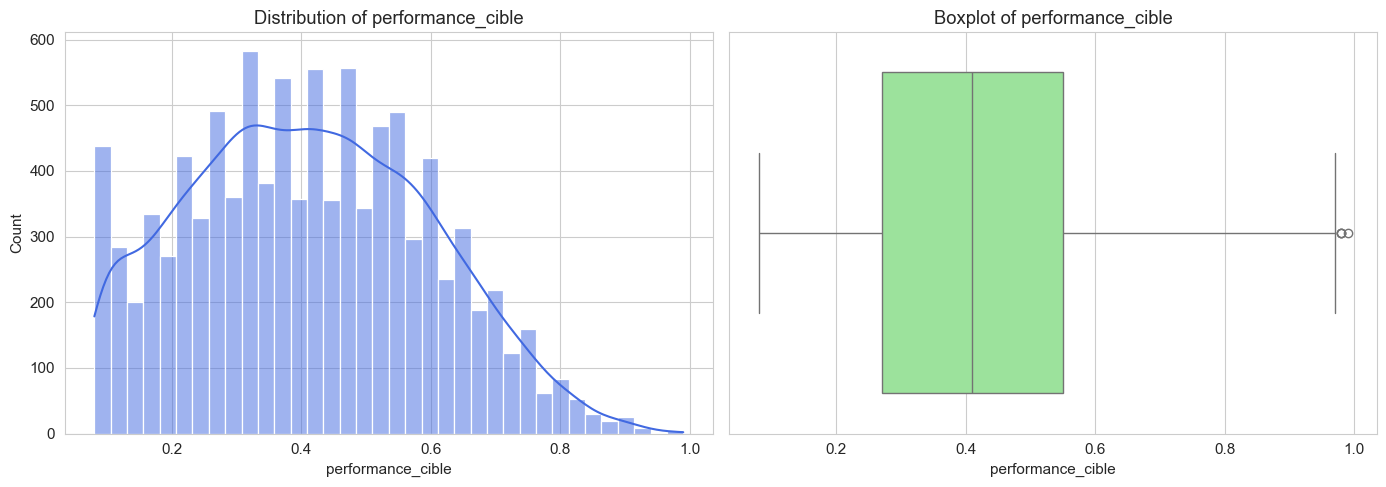

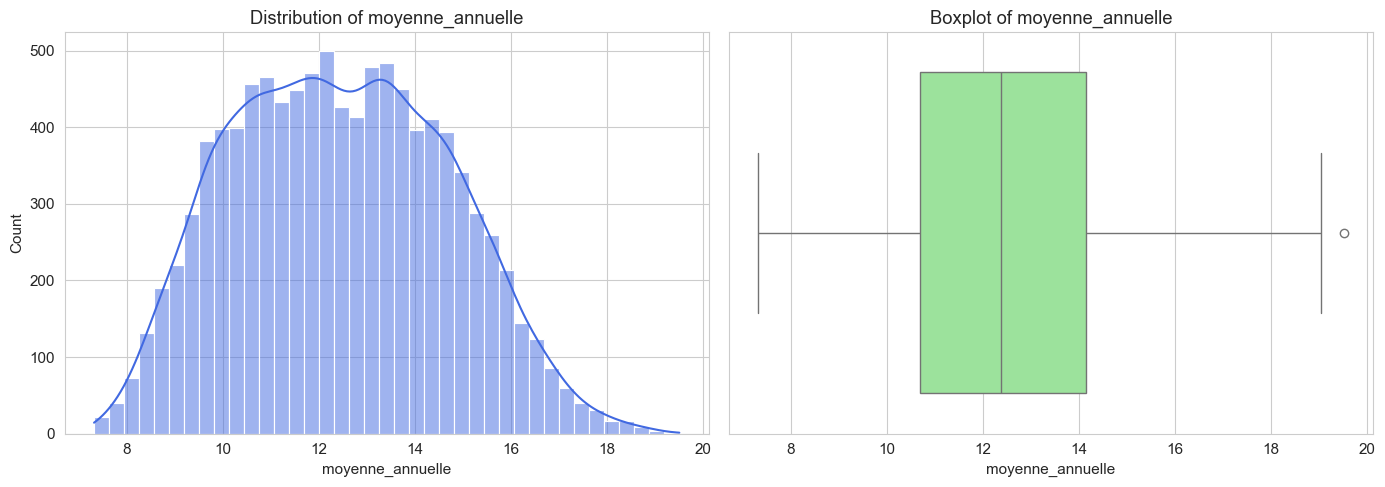

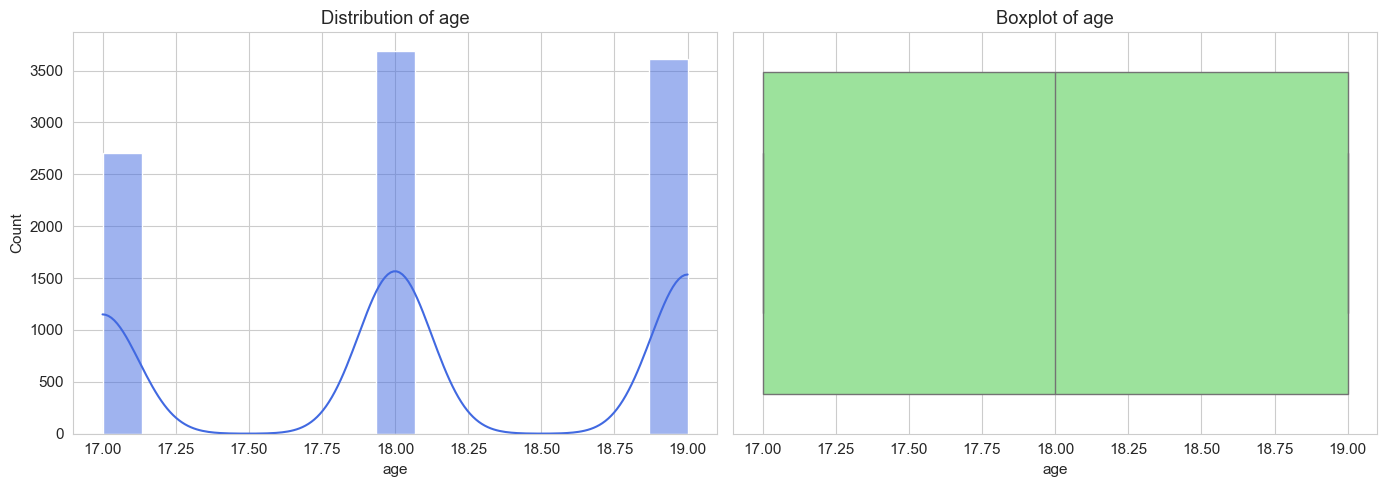

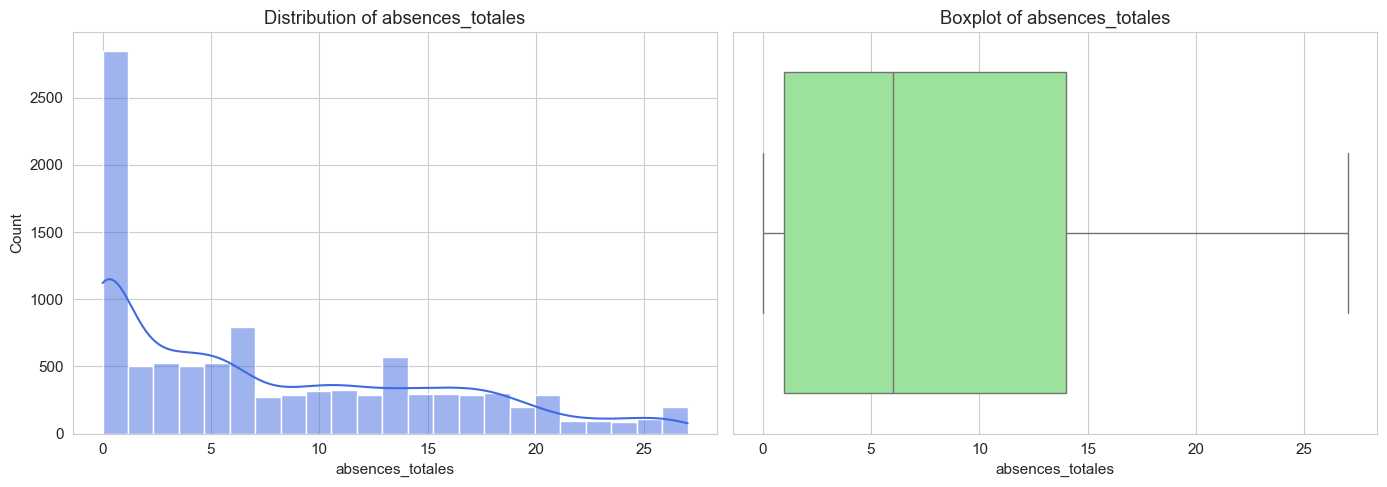

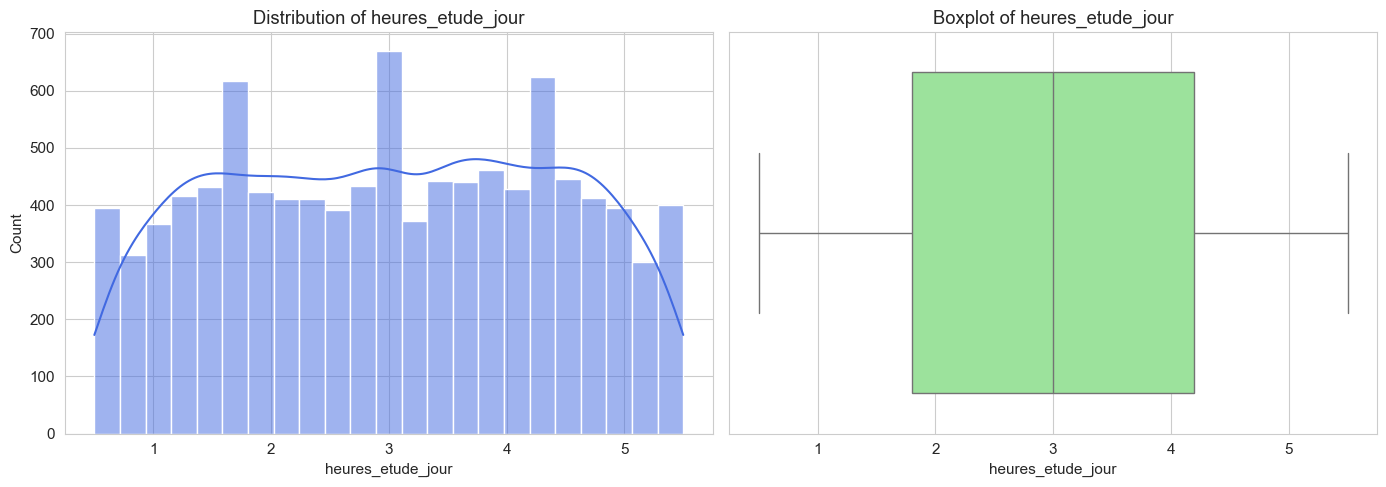

In [16]:
# المتغيرات التي سنرسم توزيعها
features_to_plot = [
    'performance_cible',   # الهدف
    'moyenne_annuelle',    # المعدل السنوي
    'age',                 # السن
    'absences_totales',    # الغياب
    'heures_etude_jour'    # ساعات الدراسة
]

for col in features_to_plot:
    if col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Histogram (التوزيع)
        sns.histplot(df[col], kde=True, ax=axes[0], color='royalblue')
        axes[0].set_title(f'Distribution of {col}')
        
        # Boxplot (القيم الشاذة)
        sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
        axes[1].set_title(f'Boxplot of {col}')
        
        plt.tight_layout()
        plt.show()

c:\Users\pc\AppData\Local\Programs\Python\Python314\Lib\site-packages\numpy\lib\_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\pc\AppData\Local\Programs\Python\Python314\Lib\site-packages\numpy\lib\_function_base_impl.py:3024: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


📈 أقوى 10 عوامل إيجابية:
performance_cible            1.000000
moyenne_annuelle             0.935637
moyenne_s1                   0.927468
moyenne_s2                   0.926299
moyenne_annee_precedente     0.896113
informatique_annuel          0.867085
arabe_annuel                 0.866121
francais_annuel              0.861588
education_physique_annuel    0.860019
svt_annuel                   0.859446
dtype: float64

📉 أقوى 10 عوامل سلبية:
age                          -0.059494
montant_tayssir              -0.198467
rang_annee_precedente        -0.730585
rang_s2                      -0.776928
rang_s1                      -0.800882
rang_annuel                  -0.800882
annee_inscription                  NaN
prise_notes                        NaN
tentatives_bac_precedentes         NaN
date_collecte                      NaN
dtype: float64


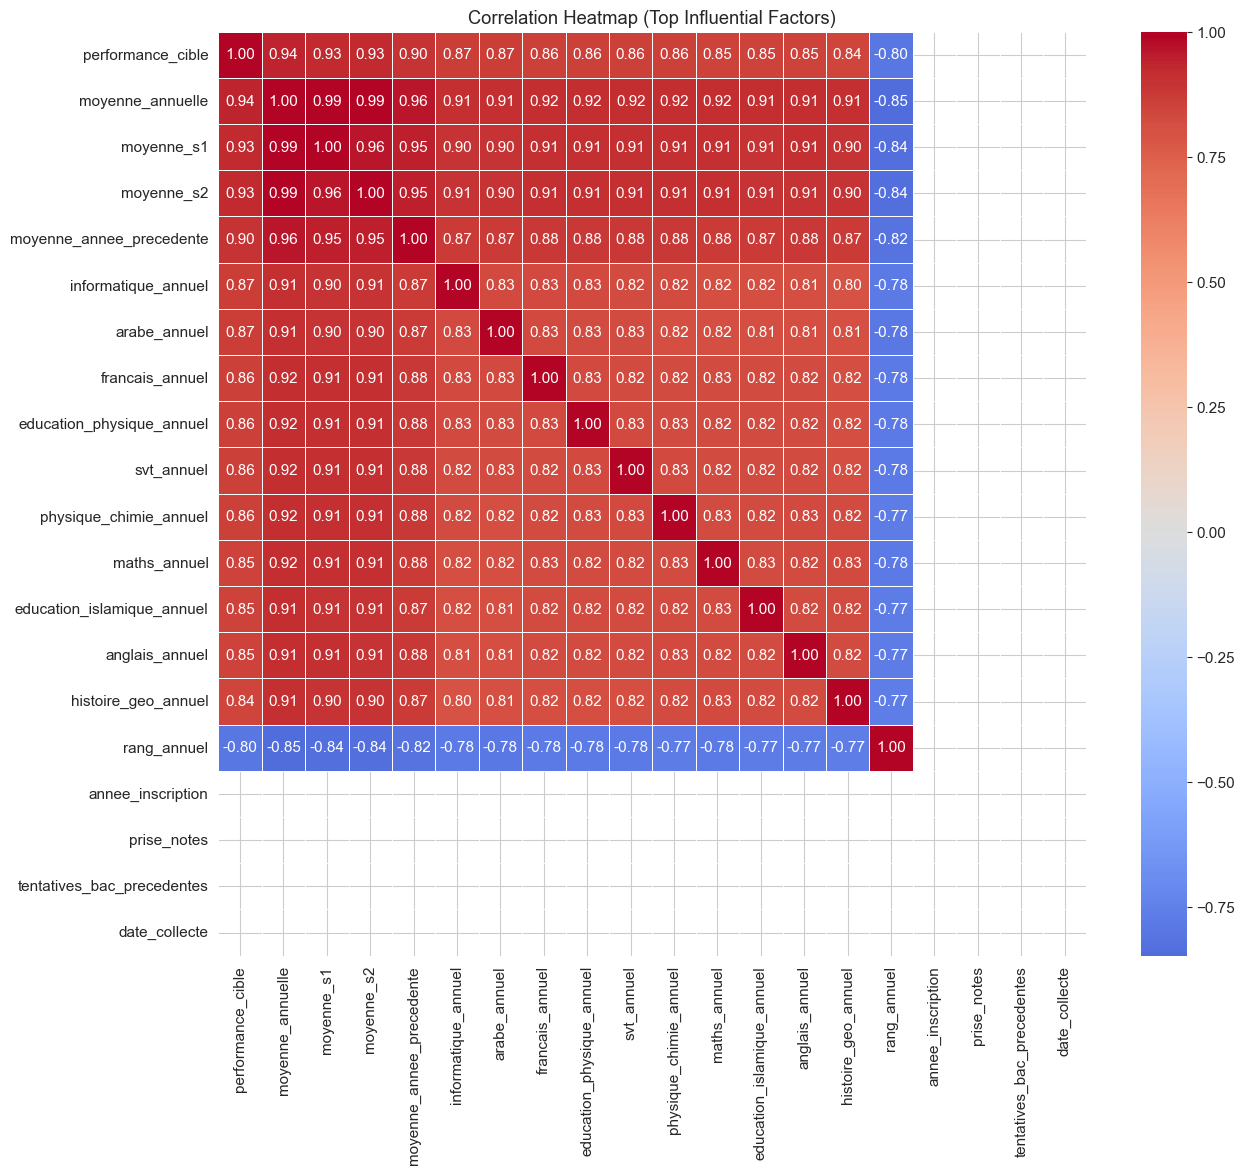

In [17]:
# حساب الارتباط بين المتغيرات الرقمية فقط
numeric_df = df.select_dtypes(include=[np.number])

# ترتيب المتغيرات حسب قوة علاقتها بـ performance_cible
correlations = numeric_df.corrwith(df[target_col]).sort_values(ascending=False)

print("📈 أقوى 10 عوامل إيجابية:")
print(correlations.head(10))
print("\n📉 أقوى 10 عوامل سلبية:")
print(correlations.tail(10))

# رسم Heatmap لأهم 15 متغير
top_features = correlations.index[:15].tolist() + correlations.index[-5:].tolist()
corr_matrix = df[top_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Heatmap (Top Influential Factors)')
plt.show()

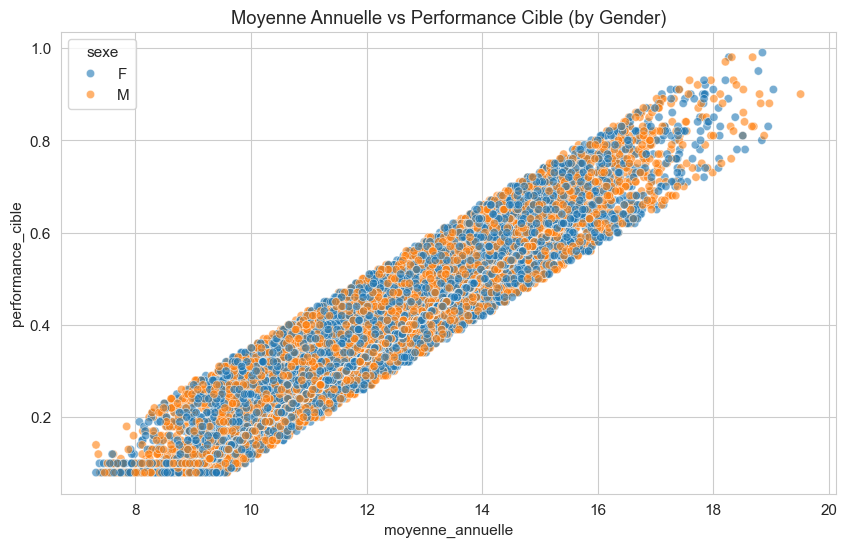

C:\Users\pc\AppData\Local\Temp\ipykernel_9200\1768671131.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=target_col, data=df, order=order, palette="Set3")


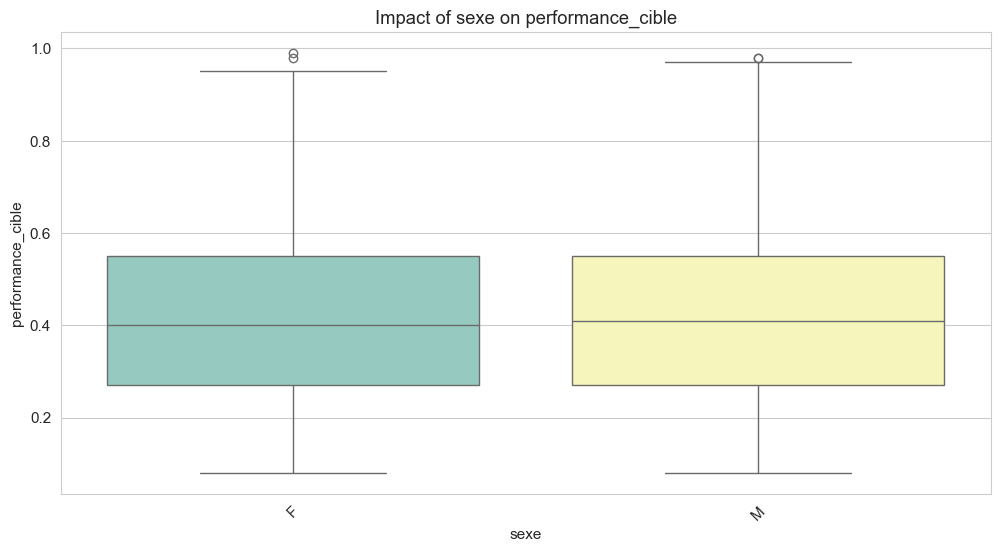

C:\Users\pc\AppData\Local\Temp\ipykernel_9200\1768671131.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=target_col, data=df, order=order, palette="Set3")


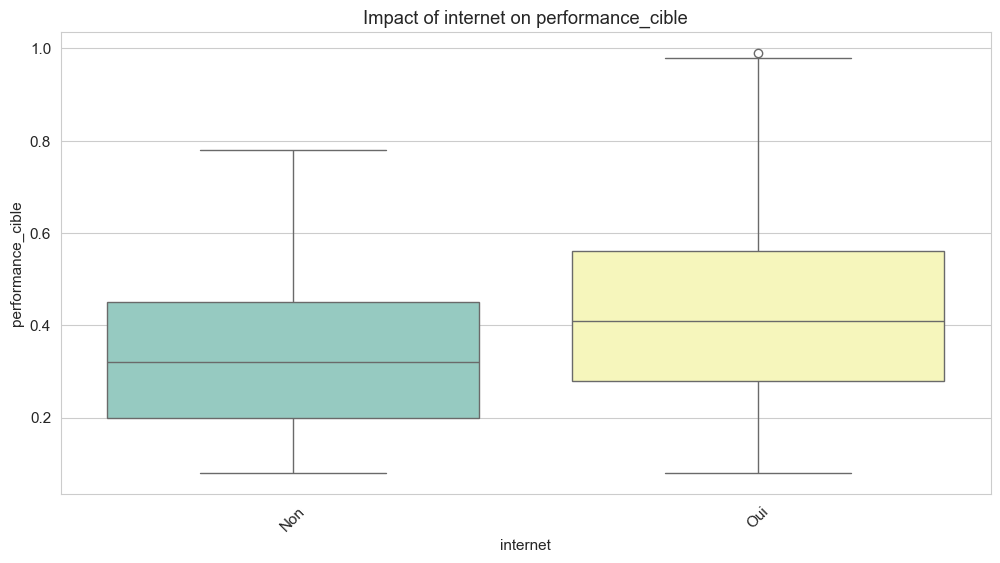

C:\Users\pc\AppData\Local\Temp\ipykernel_9200\1768671131.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=target_col, data=df, order=order, palette="Set3")


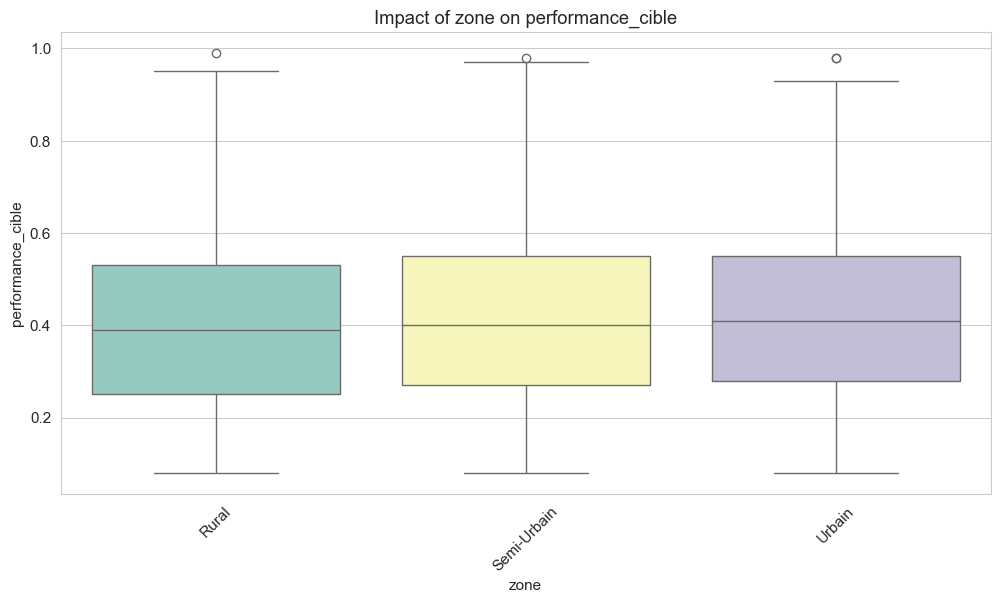

C:\Users\pc\AppData\Local\Temp\ipykernel_9200\1768671131.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=target_col, data=df_filtered, order=top_10, palette="Set3")


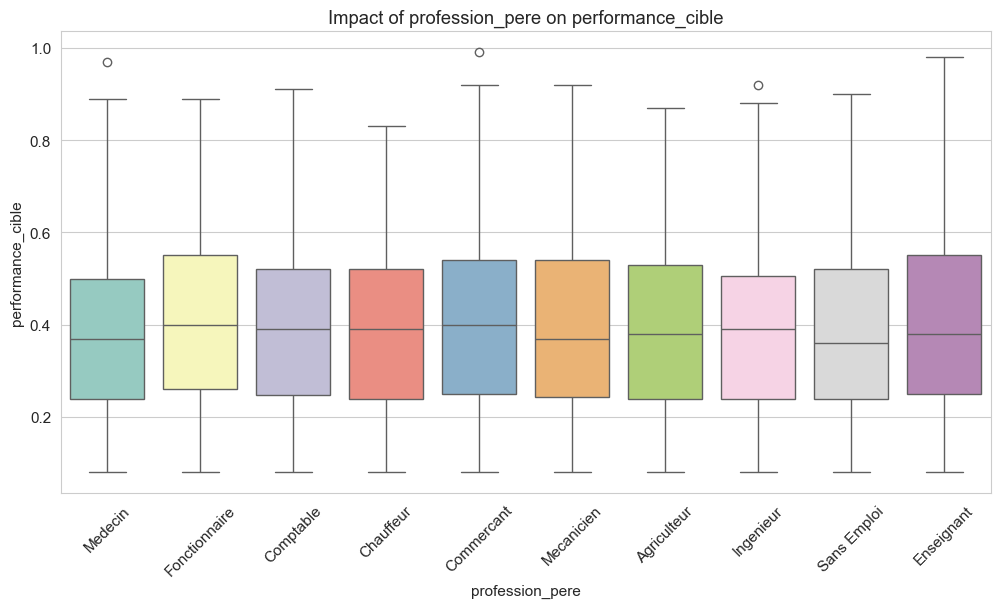

In [18]:
# 1. علاقة المعدل السنوي بالأداء (مع التفريق بالجنس)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='moyenne_annuelle', y=target_col, data=df, hue='sexe', alpha=0.6)
plt.title('Moyenne Annuelle vs Performance Cible (by Gender)')
plt.show()

# 2. تأثير المتغيرات الفئوية (Categorical Variables)
# اخترنا: الجنس، الأنترنيت، المنطقة (Zone)، ومهنة الأب
categorical_vars = ['sexe', 'internet', 'zone', 'profession_pere']

for cat_col in categorical_vars:
    if cat_col in df.columns:
        plt.figure(figsize=(12, 6))
        
        # ترتيب الفئات حسب متوسط الأداء لتسهيل القراءة
        order = df.groupby(cat_col)[target_col].median().sort_values().index
        
        # إذا كان عدد الفئات كبير (مثل مهنة الأب)، نأخذ فقط أكبر 10 فئات
        if df[cat_col].nunique() > 10:
            top_10 = df[cat_col].value_counts().head(10).index
            df_filtered = df[df[cat_col].isin(top_10)]
            sns.boxplot(x=cat_col, y=target_col, data=df_filtered, order=top_10, palette="Set3")
        else:
            sns.boxplot(x=cat_col, y=target_col, data=df, order=order, palette="Set3")
            
        plt.title(f'Impact of {cat_col} on {target_col}')
        plt.xticks(rotation=45)
        plt.show()